# **Métodos de Optimización NO Lineal**


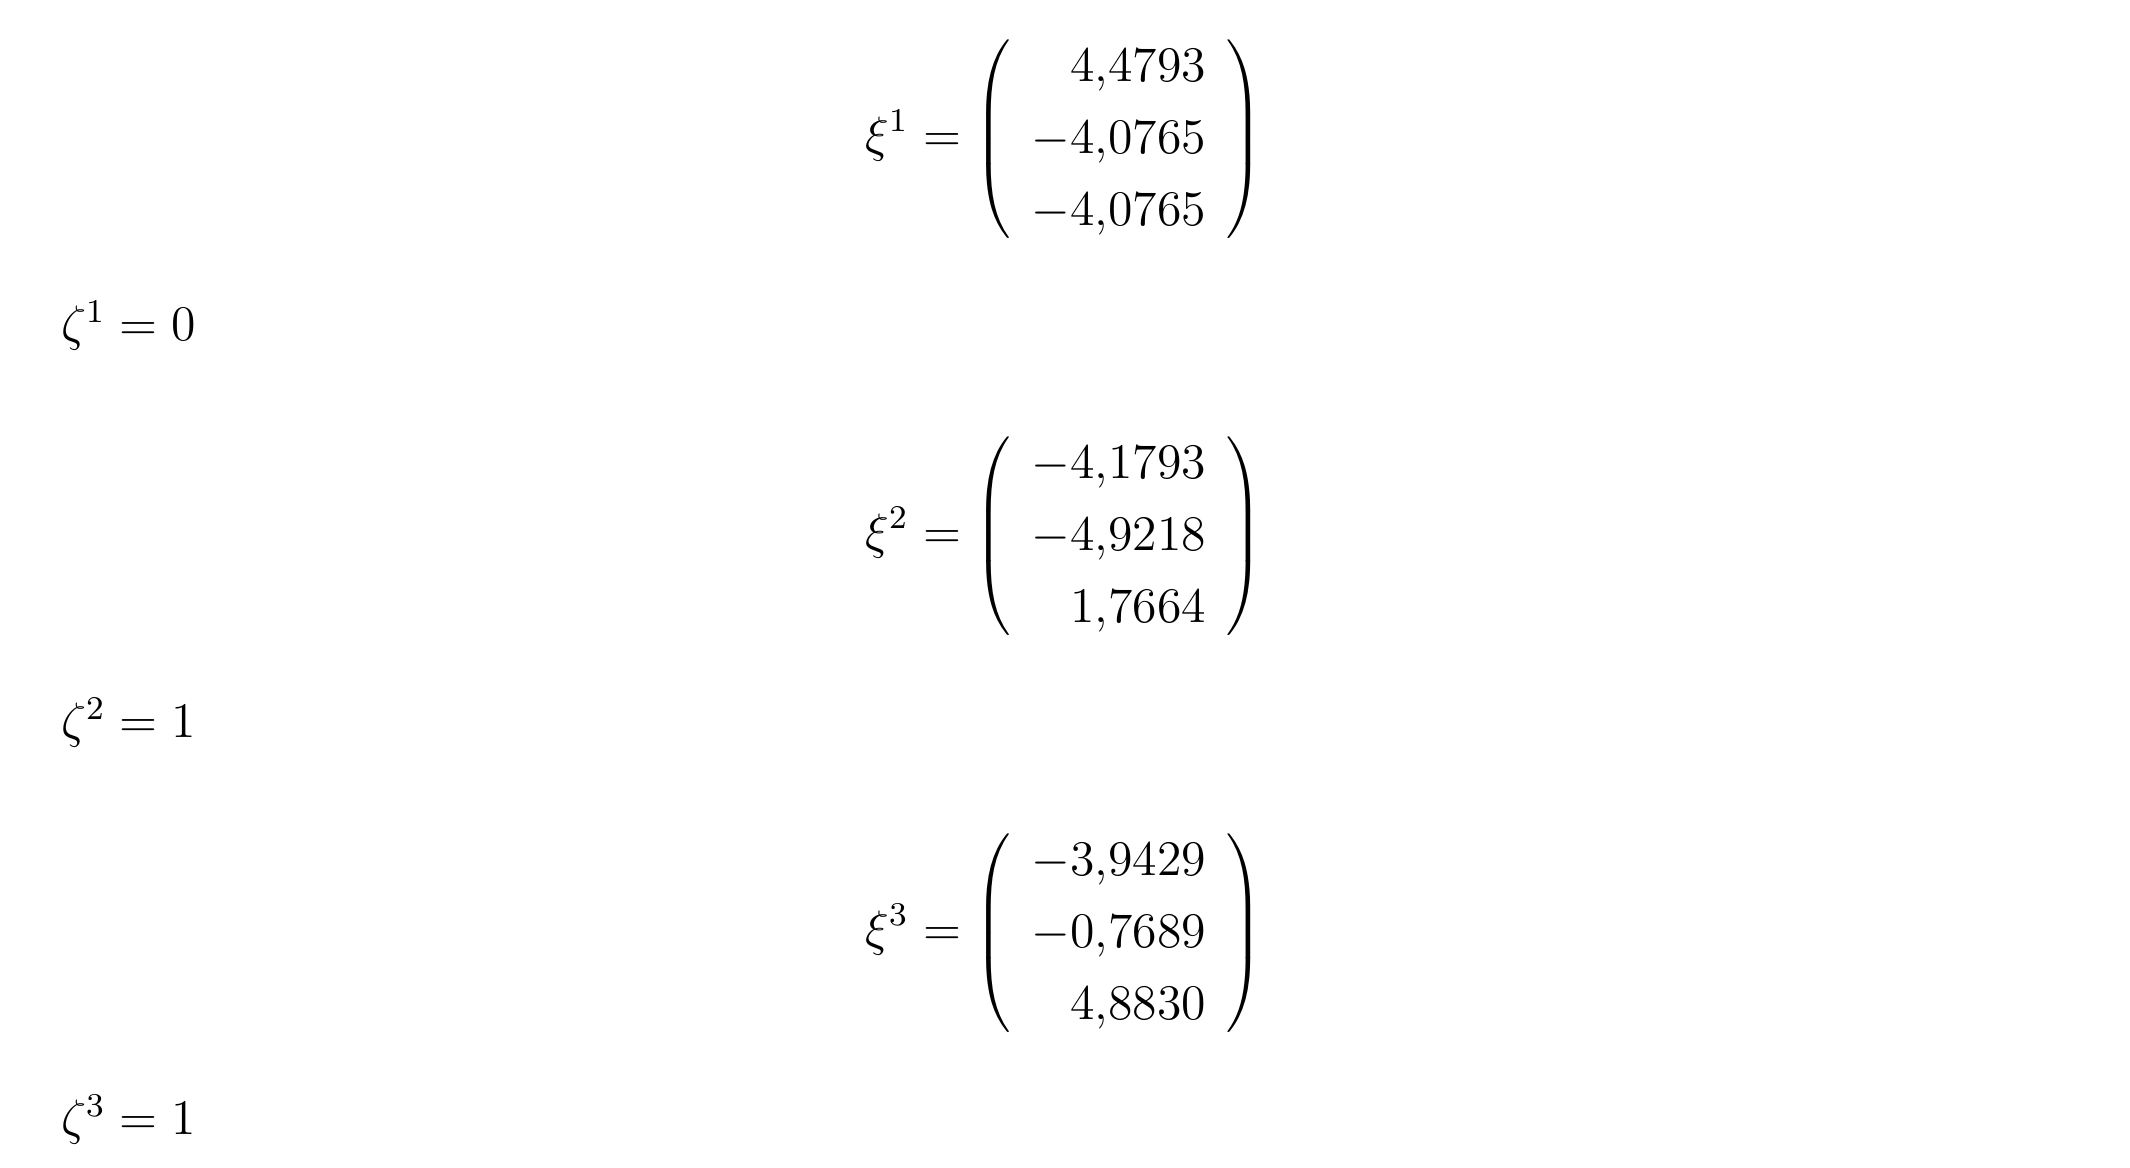


In [ ]:
import numpy as np
from types import MethodType
from math import exp

xi1 = np.array([4.4793, -4.0765, -4.0765], dtype=float)
xi2 = np.array([-4.1793, -4.9218, 1.7664], dtype=float)
xi3 = np.array([-3.9429, -0.7689, 4.8830], dtype=float)
xi = np.array([xi1, xi2, xi3], dtype=object)

zeta = np.array([0., 1., 1.])

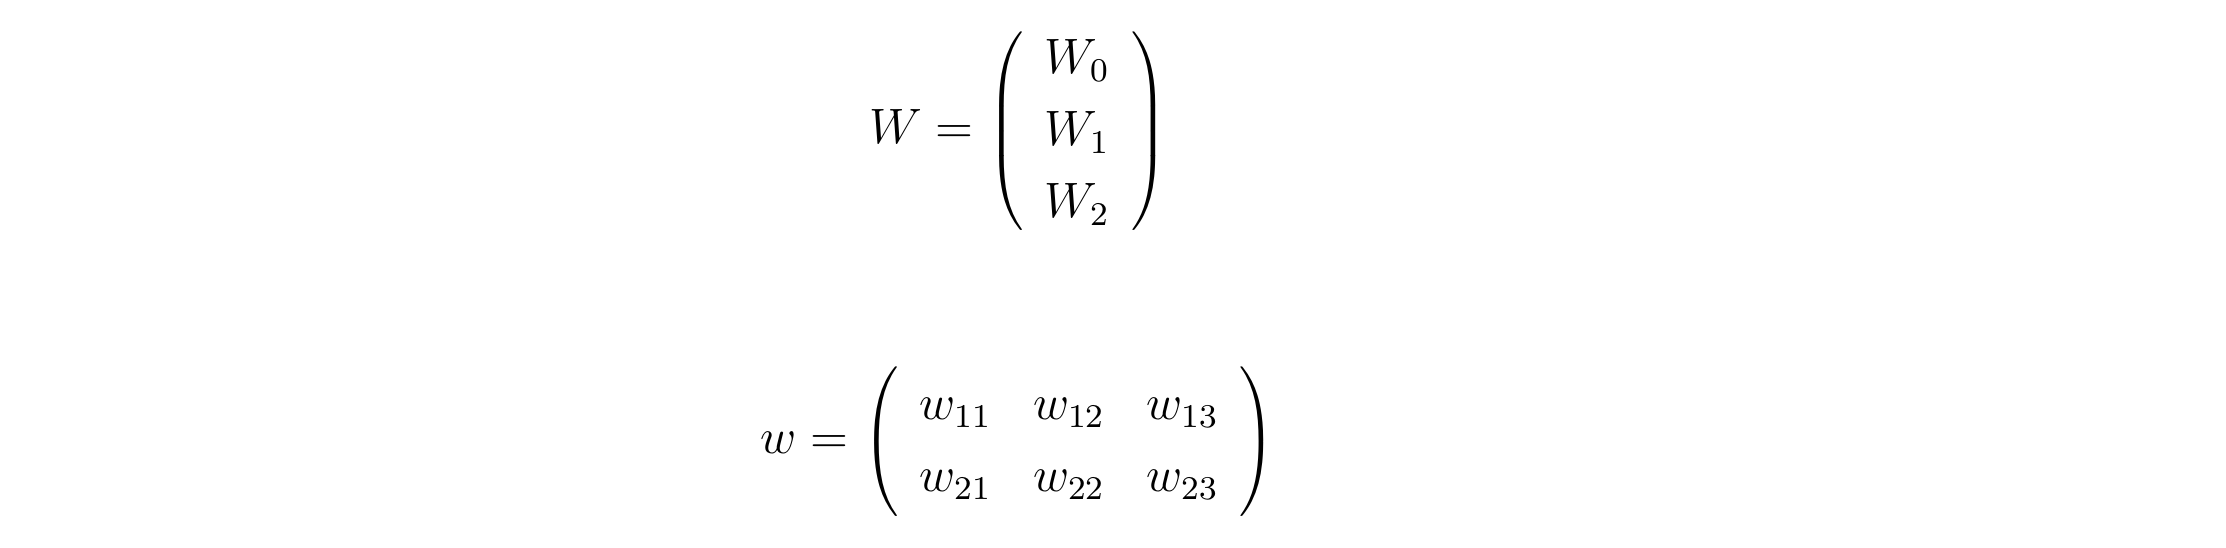

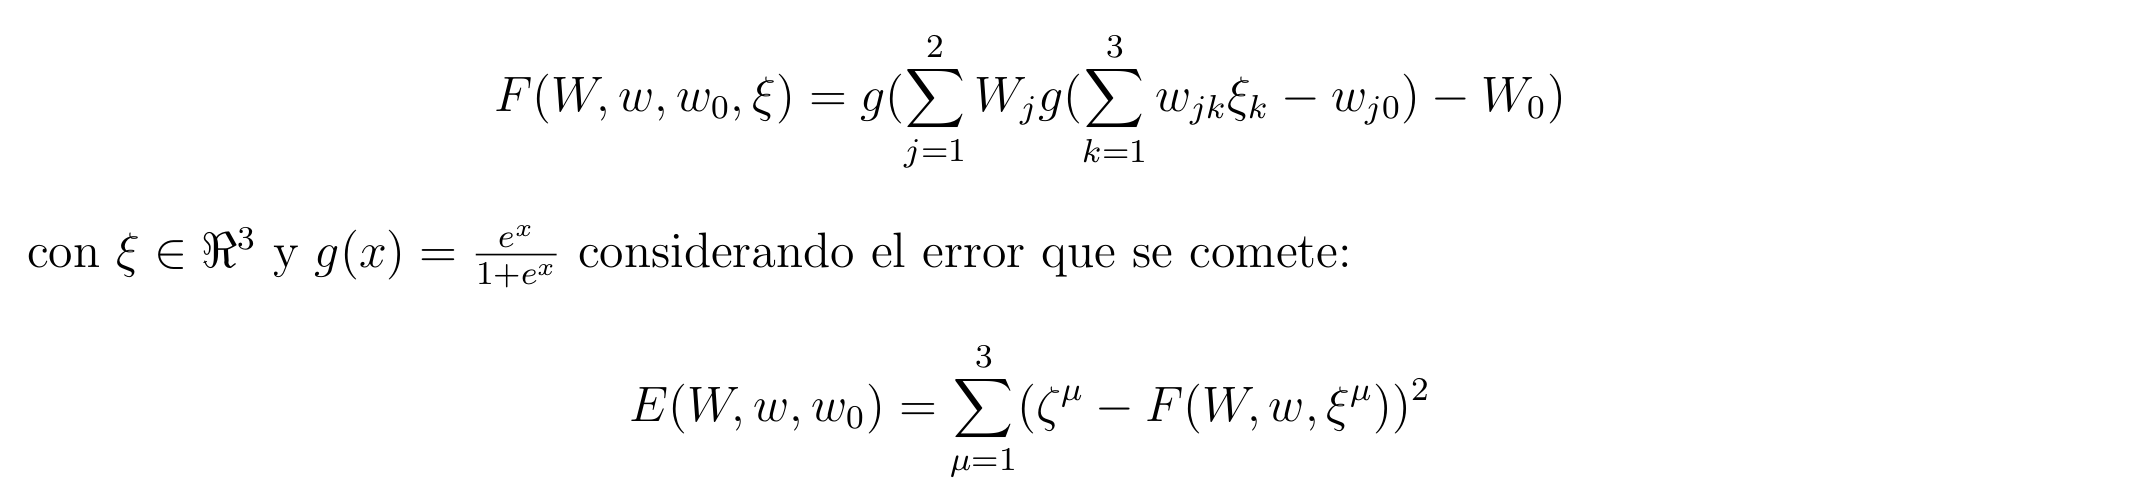

In [ ]:
def g(x):
    return exp(x) / (1 + exp(x))

def F(x, xi):
    return g(x[1] * g(x[3] * xi[0] + x[4] * xi[1] + x[5] * xi[2] - x[9])
             + x[2] * g(x[6] * xi[0] + x[7] * xi[1] + x[8] * xi[2] - x[10])
             - x[0])

def E(x):
    return sum((np.float_power((zeta[i] - F(x, xi[i])), 2)) for i in range(3))

In [ ]:
from datetime import datetime
from scipy.optimize import minimize

def start_timer():
    return datetime.now()

def end_timer(time):
    return datetime.now() - time

def print_arg(x):
    print('Valor del argumento')
    print('W: [ {0:2.5f} , {1:2.5f} , {2:2.5f} ]'.format(x[0], x[1], x[2]))
    print('w: [ {0:2.5f} , {1:2.5f} , {2:2.5f} ] , [ {3:2.5f} , {4:2.5f} , {5:2.5f} ]'.format(x[3], x[4], x[5], x[6], x[7], x[8]))
    print('w_0: [ {0:2.5f} , {1:2.5f} ]'.format(x[9], x[10]))

x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# **Gradiente descendiente**

In [ ]:
time = start_timer()
sgd = minimize(E, x, method="L-BFGS-B")
print("Gradiente descendente")
print_arg(sgd.x)
print("Error: ", sgd.fun)
print('Time: ', end_timer(time), '\n')

Gradiente descendente
Valor del argumento
W: [ 6.33721 , 6.61921 , 6.61921 ]
w: [ -6.33923 , 1.61217 , 5.44763 ] , [ -6.33923 , 1.61217 , 5.44763 ]
w_0: [ 0.23744 , 0.23744 ]
Error:  5.141423956805489e-06
Time:  0:00:00.012496 



# **Gradientes conjugados**

In [ ]:
time = start_timer()
cg = minimize(E, x, method="CG")
print('Gradientes conjugados')
print_arg(cg.x)
print("Error: ", cg.fun)
print('Time: ', end_timer(time))

Gradientes conjugados
Valor del argumento
W: [ 6.14978 , 7.12182 , 7.12182 ]
w: [ -2.76091 , 0.53929 , 2.34594 ] , [ -2.76091 , 0.53929 , 2.34594 ]
w_0: [ 0.06284 , 0.06284 ]
Error:  4.720788338621333e-06
Time:  0:00:00.024311


# **ADAM**

In [ ]:
# TODO